In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __init__ import *
# from runner.svg2plan import run_new_layout
from new_solutions.selection import *
from domains.domain import Domain

from read.svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator
from adjacencies.connectivity import ConnectivityGenerator
from placement.executer import PlacementExecuter
from visuals.plotter import Plotter, plot_general
from export.saver import save_pickle

In [3]:
case  ="amber_c_f01.svg"
sv = SVGReader(case)
sv.run()

No reference for svg to meters conversion!! 


In [4]:
sv.layout.domains

{'m_bed': Domain(m_bed, x=[0.11-2.24], y=[8.87-11.32]),
 'bed1_closet': Domain(bed1_closet, x=[3.03-4.18], y=[8.42-8.79]),
 'transit': Domain(transit, x=[1.79-2.94], y=[7.83-8.79]),
 'm_closet': Domain(m_closet, x=[0.11-1.58], y=[7.94-8.82]),
 'laundry': Domain(laundry, x=[3.03-4.18], y=[7.25-8.34]),
 'den': Domain(den, x=[2.37-4.18], y=[5.12-7.17]),
 'kitchen': Domain(kitchen, x=[0.11-1.58], y=[2.60-5.27]),
 'living': Domain(living, x=[0.11-3.27], y=[0.00-2.42]),
 'dining': Domain(dining, x=[1.73-3.27], y=[2.42-5.02]),
 'den_closet': Domain(den_closet, x=[3.52-4.18], y=[4.66-5.02]),
 'm_bath': Domain(m_bath, x=[0.00-1.61], y=[6.49-7.73]),
 'bath': Domain(bath, x=[0.03-1.61], y=[5.43-6.36]),
 'linen': Domain(linen, x=[2.37-2.94], y=[7.25-7.64]),
 'corridor': Domain(corridor, x=[1.79-2.24], y=[5.02-7.73]),
 'bed1': Domain(bed1, x=[2.37-4.18], y=[8.87-11.32])}

In [5]:
plot_general(sv.layout.domains)

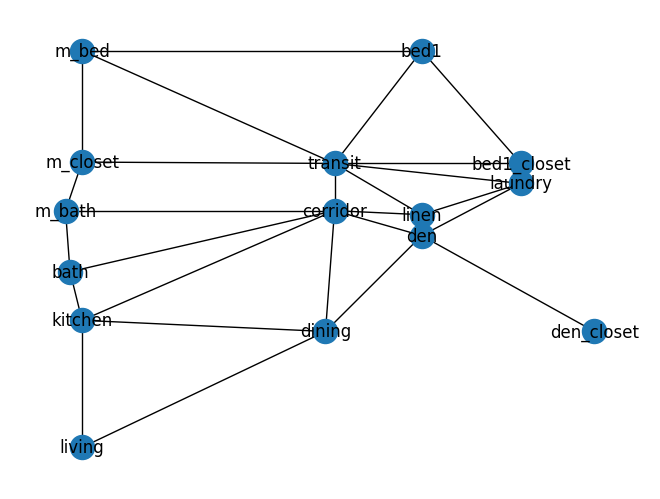

In [6]:
ag = AdjacencyGenerator(sv.layout, buffer_size=0.11)
ag.run()
ag.draw_graph()

In [66]:
ag.G.nodes["m_bath"]

{'data': NeighborDirections(NORTH=['transit', 'm_closet'], SOUTH=['bath'], EAST=['transit', 'corridor'], WEST=[])}

In [7]:
save_pickle(ag.layout, "1001_amber_c_ag")

'1001_amber_c_ag'

In [ ]:
pe = PlacementExecuter(ag.layout)
pe.run()

In [26]:
pe.tracker

{0: ['m_bed', 'm_closet', 'm_bath', 'bath', 'kitchen'],
 1: ['bed1', 'transit', 'corridor', 'dining', 'living']}

In [33]:
pe.new_layout.domains = {k:v for k,v in pe.new_layout.domains.items() if v}

In [34]:
pe.prepare_data_for_export()

In [35]:
plot_general(pe.layout.domains)

In [37]:
# re = Reporter(pe.layout)
# re.run()

In [ ]:
# c = Cook(report)
# c.run_again()
# c.plot_all()